Information retrival (+) text Generation = accurate and relevant responses

3 components of RAG architecture 
1) Input Query
2) Retrival
3) Generator

In [3]:
# Sample dataset with facts about Berlin
documents = [
    "Berlin is the capital and largest city of Germany by both area and population.",
    "Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.",
    "The Berlin Wall, which divided the city from 1961 to 1989, was a significant Cold War symbol.",
    "Berlin has more bridges than Venice, with around 1,700 bridges.",
    "The city's Zoological Garden is the most visited zoo in Europe and one of the most popular worldwide.",
    "Berlin's Museum Island is a UNESCO World Heritage site with five world-renowned museums.",
    "The Reichstag building houses the German Bundestag (Federal Parliament).",
    "Berlin is famous for its diverse architecture, ranging from historic buildings to modern structures.",
    "The Berlin Marathon is one of the world's largest and most popular marathons.",
    "Berlin's public transportation system includes buses, trams, U-Bahn (subway), and S-Bahn (commuter train).",
    "The Brandenburg Gate is an iconic neoclassical monument in Berlin.",
    "Berlin has a thriving startup ecosystem and is considered a major tech hub in Europe.",
    "The city hosts the Berlinale, one of the most prestigious international film festivals.",
    "Berlin has more than 180 kilometers of navigable waterways.",
    "The East Side Gallery is an open-air gallery on a remaining section of the Berlin Wall.",
    "Berlin's Tempelhofer Feld, a former airport, is now a public park and recreational area.",
    "The TV Tower at Alexanderplatz offers panoramic views of the city.",
    "Berlin's Tiergarten is one of the largest urban parks in Germany.",
    "Checkpoint Charlie was a famous crossing point between East and West Berlin during the Cold War.",
    "Berlin is home to numerous theaters, including the Berliner Ensemble and the Volksbühne.",
    "The Berlin Philharmonic Orchestra is one of the most famous orchestras in the world.",
    "Berlin has a vibrant nightlife scene, with countless bars, clubs, and music venues.",
    "The Berlin Cathedral is a major Protestant church and a landmark of the city.",
    "Charlottenburg Palace is the largest palace in Berlin and a major tourist attraction.",
    "Berlin's Alexanderplatz is a large public square and transport hub in central Berlin.",
    "Berlin is known for its street art, with many murals and graffiti artworks around the city.",
    "The Gendarmenmarkt is a historic square in Berlin featuring the Konzerthaus, French Cathedral, and German Cathedral.",
    "Berlin has a strong coffee culture, with numerous cafés throughout the city.",
    "The Berlin TV Tower is the tallest structure in Germany, standing at 368 meters.",
    "Berlin's KaDeWe is one of the largest and most famous department stores in Europe.",
    "The Berlin U-Bahn network has 10 lines and serves 173 stations.",
    "Berlin has a population of over 3.6 million people.",
    "The city of Berlin covers an area of 891.8 square kilometers.",
    "Berlin has a temperate seasonal climate.",
    "The Berlin International Film Festival, also known as the Berlinale, is one of the world's leading film festivals.",
    "Berlin is home to the Humboldt University, founded in 1810.",
    "The Berlin Hauptbahnhof is the largest train station in Europe.",
    "Berlin's Tegel Airport closed in 2020, and operations moved to Berlin Brandenburg Airport.",
    "The Spree River runs through the center of Berlin.",
    "Berlin is twinned with Los Angeles, California, USA.",
    "The Berlin Botanical Garden is one of the largest and most important botanical gardens in the world.",
    "Berlin has over 2,500 public parks and gardens.",
    "The Victory Column (Siegessäule) is a famous monument in Berlin.",
    "Berlin's Olympic Stadium was built for the 1936 Summer Olympics.",
    "The Berlin State Library is one of the largest libraries in Europe.",
    "The Berlin Dungeon is a popular tourist attraction that offers a spooky look at the city's history.",
    "Berlin's economy is based on high-tech industries and the service sector.",
    "Berlin is a major center for culture, politics, media, and science.",
    "The Berlin Wall Memorial commemorates the division of Berlin and the victims of the Wall.",
    "The city has a large Turkish community, with many residents of Turkish descent.",
    "Berlin's Mauerpark is a popular park known for its flea market and outdoor karaoke sessions.",
    "The Berlin Zoological Garden is the oldest zoo in Germany, opened in 1844.",
    "Berlin is known for its diverse culinary scene, including many vegan and vegetarian restaurants.",
    "The Berliner Dom is a baroque-style cathedral located on Museum Island.",
    "The DDR Museum in Berlin offers interactive exhibits about life in East Germany.",
    "Berlin has a strong cycling culture, with many dedicated bike lanes and bike-sharing programs.",
    "Berlin's Tempodrom is a multi-purpose event venue known for its unique architecture.",
    "The Berlinische Galerie is a museum of modern art, photography, and architecture.",
    "Berlin's Volkspark Friedrichshain is the oldest public park in the city, established in 1848.",
    "The Hackesche Höfe is a complex of interconnected courtyards in Berlin's Mitte district, known for its vibrant nightlife and art scene.",
    "Berlin's International Congress Center (ICC) is one of the largest conference centers in the world."
]

# tokenization and embeddings

In [2]:
#install the faiss-cpu library
!pip install faiss-cpu

   ---------------------------------------- 0.0/13.7 MB ? eta -:--:--
    --------------------------------------- 0.3/13.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.7 MB 11.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/13.7 MB 2.5 MB/s eta 0:00:05
   ------ --------------------------------- 2.1/13.7 MB 2.9 MB/s eta 0:00:05
   ------ --------------------------------- 2.4/13.7 MB 2.5 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/13.7 MB 2.7 MB/s eta 0:00:04
   ---------- ----------------------------- 3.7/13.7 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.9/13.7 MB 2.5 MB/s eta 0:00:04
   --------------- ------------------------ 5.2/13.7 MB 2.9 MB/s eta 0:00:03
   ---------------- ----------------------- 5.8/13.7 MB 2.9 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.7 MB 2.9 MB/s eta 0:00:03
   ------------------- -------------------- 6.6/13.7 MB 2.8 MB/s eta 0:00:03
   ---------

In [1]:
# Import Libraries
import faiss
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel

In [4]:
#intiialize the tokenizer and model
# Initialize the tokenizer and model for generating embeddings
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/paraphrase-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/paraphrase-MiniLM-L6-v2")

In [5]:
 #Function to tokenize the input
def embed_text(text,tokenizer,model):
    #Tokenize the input text ,retuen tensors in pytorch
    inputs=tokenizer(text,
                     return_tensors="pt",
                     padding=True,
                     truncation=True)
    #disable gradient calucaltions
    with torch.no_grad():
        #pass the tokenized input through model
        embeddings=model(**inputs).last_hidden_state

        embeddings=embeddings.mean(dim=1)
    
    return embeddings

                        
                     
    

In [6]:
document_embeddings=[]

#lopp through the document to compute the embedding
for doc in documents:
    doc_embedding=embed_text(doc,tokenizer,model)
    document_embeddings.append(doc_embedding)

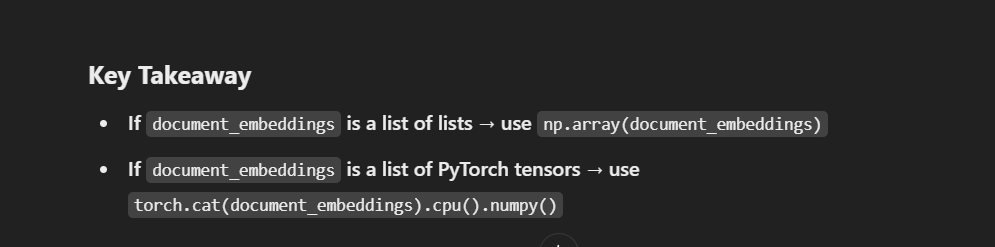

In [13]:
import numpy as np
document_embeddings = np.array(document_embeddings)
print(document_embeddings.shape)


(61, 1, 384)


In [7]:
#concatenate all embeddings into pytorch tensor
document_embeddings=torch.cat(document_embeddings).cpu().numpy()

In [8]:
document_embeddings

array([[ 4.4676778e-01,  1.7827100e-01, -7.5979762e-02, ...,
        -1.2662199e-01, -6.9654876e-01,  2.3290634e-01],
       [ 7.0775189e-02,  4.9291265e-01, -7.2827019e-02, ...,
        -5.6186762e-02, -6.2322754e-01,  3.0493334e-01],
       [-3.0446485e-01,  8.7229657e-01, -2.3822074e-01, ...,
        -1.6262877e-01, -6.9939291e-01,  2.7724475e-01],
       ...,
       [ 2.0209843e-01,  4.1806766e-01, -6.0605150e-02, ...,
        -4.7432166e-02, -4.7963837e-01, -7.9868984e-04],
       [ 3.0231062e-01,  2.8403014e-01, -3.7872145e-01, ...,
         1.4499681e-01, -5.9215403e-01,  5.2380767e-02],
       [ 2.8142786e-01, -1.3164423e-01, -8.1741029e-01, ...,
        -5.3626787e-02,  4.8628643e-02,  4.7794580e-03]], dtype=float32)

# Build the retrival system

In [9]:
#Initialize the Faiss INDEX
index=faiss.IndexFlatL2(document_embeddings.shape[1])
index.add(document_embeddings)


In [10]:
#retrival --> build a function to retrive information 
def retrieve(query,tokenizer,model,index,documents,top_k=3):
    query_embedding =embed_text(query,tokenizer,model)
    distances,indices=index.search(query_embedding,top_k)
    return [documents[i] for i in indices[0]],distances[0]

In [11]:
#test twhe retrival function
query="what is the capital of germany?"
# Retrieve the most similar documents and their distances using the retrieval function
retrieved_docs, distances = retrieve(query, tokenizer, model, index, documents)

# Print the retrieved documents
print(retrieved_docs)
# Print the distances of the retrieved documents from the query
print(distances)

['Berlin is the capital and largest city of Germany by both area and population.', 'Berlin is a major center for culture, politics, media, and science.', 'Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.']
[36.253918 45.818718 48.381382]


# integrating the generative sysytem 

In [12]:
from transformers import AutoModelForCausalLM

In [13]:
# Initialize the tokenizer and model for text generation
# Load the GPT-2 tokenizer and model for generating text
gen_tokenizer = AutoTokenizer.from_pretrained("gpt2")
gen_model = AutoModelForCausalLM.from_pretrained("gpt2")

In [14]:
#set the pad token to the  EOS token
gen_tokenizer.pad_token=gen_tokenizer.eos_token

In [15]:
 # Define the context
context = " ".join(retrieved_docs)
context 

'Berlin is the capital and largest city of Germany by both area and population. Berlin is a major center for culture, politics, media, and science. Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.'

In [16]:
input_text = f"Context {context}\nQuestion: {query}\nAnswer:"

    # Tokenize the input text and prepare tensors for the model
inputs = tokenizer(input_text,
                       return_tensors="pt",
                       padding=True,
                       truncation=True)

input_ids = inputs['input_ids']
attention_masks = (input_ids != tokenizer.pad_token_id).long()\\it provide the masking 


In [17]:
input_ids,attention_masks

(tensor([[  101,  6123,  4068,  2003,  1996,  3007,  1998,  2922,  2103,  1997,
           2762,  2011,  2119,  2181,  1998,  2313,  1012,  4068,  2003,  1037,
           2350,  2415,  2005,  3226,  1010,  4331,  1010,  2865,  1010,  1998,
           2671,  1012,  4068,  2003,  2124,  2005,  2049,  2396,  3496,  1998,
           2715, 16209,  2066,  1996,  4068,  2121,  6316,  8167,  8202,  2666,
           1012,  3160,  1024,  2054,  2003,  1996,  3007,  1997,  2762,  1029,
           3437,  1024,   102]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))

In [18]:
attention_masks2=inputs['attention_mask']

In [19]:
attention_masks2

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [20]:
# Define a function to generate text based on context and query
def generate_text(context, query, model, tokenizer, max_length = 100):
    # Format the input text with context and query
    input_text = f"Context {context}\nQuestion: {query}\nAnswer:"

    # Tokenize the input text and prepare tensors for the model
    inputs = tokenizer(input_text,
                       return_tensors="pt",
                       padding=True,
                       truncation=True)

    input_ids = inputs['input_ids']
    attention_masks = (input_ids != tokenizer.pad_token_id).long()

    # Generate text using the model
    outputs = model.generate(
        input_ids,
        attention_mask=attention_masks,
        max_length=max_length,
        pad_token_id=tokenizer.eos_token_id
    )

    # Decode the generated text to a readable format
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [21]:
# Text the function
generated_answer = generate_text(context, query, gen_model, gen_tokenizer)
print(f"Generated Answer: {generated_answer}")

Generated Answer: Context Berlin is the capital and largest city of Germany by both area and population. Berlin is a major center for culture, politics, media, and science. Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.
Question: what is the capital of germany?
Answer: Berlin is the capital of germany. Berlin is a major center for culture, politics, media, and science. Berlin is known for its art scene and modern landmarks like


# RAG SYSTEM

In [23]:
#define the rag function than integrate retrival and generation
def rag(query,retrieval_tokenizer,retrieval_model,retrival_index,gen_model,gen_tokenizer,documents,top_k):
    retrieved_docs,distances=retrieve(query,retrieval_tokenizer,
                                      retrieval_model,
                                      retrival_index,
                                      documents,top_k)
    context=" ".join(retrieved_docs)
    generated_answer = generate_text(context, query, gen_model, gen_tokenizer)
    return generated_answer

In [24]:
# Text the RAG System
query = "What is Berlin famous for?"
answer = rag(query, tokenizer, model, index, gen_model, gen_tokenizer, documents, 3)
print(f"Answer: {answer}")

Answer: Context Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie. Berlin is a major center for culture, politics, media, and science. Berlin is famous for its diverse architecture, ranging from historic buildings to modern structures.
Question: What is Berlin famous for?
Answer: Berlin is famous for its art scene and modern landmarks like the Berliner Philharmonie. Berlin is famous for its diverse architecture, ranging from historic buildings to modern structures.
Question


In [25]:
# Test the RAG System with multiple queries
queries = ["What is the capital of Germany?",
           "What is Berlin famous for?",
           "Who discovered the way to Brazil?",
           "What is the most famous person in Lesotho?"]

In [30]:
# Test the RAG system with multiple queries
for query in queries:
  # Get the generated answer for each query using the RAG function
  answer = rag(query,
               tokenizer,
               model, index,
               gen_model,
               gen_tokenizer,
               documents,
               3)

  # Print the query and the corresponding generated answer
  print(f"Query: {query}\nAnswer: {answer}\n")
  print("-"*50)  

Query: What is the capital of Germany?
Answer: Context Berlin is the capital and largest city of Germany by both area and population. Berlin is a major center for culture, politics, media, and science. Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.
Question: What is the capital of Germany?
Answer: Berlin is the capital of Germany.
Question: What is the capital of Germany?
Answer: Berlin is the capital of Germany.
Question: What is the capital of Germany?

--------------------------------------------------
Query: What is Berlin famous for?
Answer: Context Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie. Berlin is a major center for culture, politics, media, and science. Berlin is famous for its diverse architecture, ranging from historic buildings to modern structures.
Question: What is Berlin famous for?
Answer: Berlin is famous for its art scene and modern landmarks like the Berliner Philharmonie. Berlin is 

* Improve the defination of relevance
* Improve the generation -> explore the parameters



In [32]:
for query in queries:
  # Retrieve documents and distances for each query
  retrived_docs, distances = retrieve(query,
                                      tokenizer,
                                      model,
                                      index,
                                      documents,
                                      top_k = 3)
  # Print the query
  print(f"Query: {query}")

  # Print the distances of retrieved documents
  print(f"Distances: {distances}")

  # Print the retrieved documents
  print(f"Documents: {retrieved_docs}")

  # Print a blank line for readability
  print()

Query: What is the capital of Germany?
Distances: [36.253918 45.818718 48.381382]
Documents: ['Berlin is the capital and largest city of Germany by both area and population.', 'Berlin is a major center for culture, politics, media, and science.', 'Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.']

Query: What is Berlin famous for?
Distances: [30.655819 34.76213  35.3083  ]
Documents: ['Berlin is the capital and largest city of Germany by both area and population.', 'Berlin is a major center for culture, politics, media, and science.', 'Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.']

Query: Who discovered the way to Brazil?
Distances: [70.43681  77.73715  77.846054]
Documents: ['Berlin is the capital and largest city of Germany by both area and population.', 'Berlin is a major center for culture, politics, media, and science.', 'Berlin is known for its art scene and modern landmarks like the Berliner Philha

In [33]:
#define a function that checks for relevance
#if the distance if above 40  discard the document
def is_relevant(distance,threshold=40):
    return distance<threshold

In [38]:
#define the rag function than integrate retrival and generation
def rag(query,retrieval_tokenizer,retrieval_model,retrival_index,gen_model,gen_tokenizer,documents,top_k):
    retrieved_docs,distances=retrieve(query,retrieval_tokenizer,
                                      retrieval_model,
                                      retrival_index,
                                      documents,top_k)
    #discard all documents that do not meet the relevance criteria
    relevant_docs = [doc for doc, distance in zip(retrieved_docs, distances) if is_relevant(distance, 40)]

    #add a message if no retieved doc is relevant
    if not relevant_docs:
        return "There is no relevant information"
    context=" ".join(retrieved_docs)
    generated_answer = generate_text(context, query, gen_model, gen_tokenizer)
    return generated_answer

In [39]:
# Test the RAG system
for query in queries:
  # Get the generated answer for each query using the RAG function
  answer = rag(query,
               tokenizer,
               model, index,
               gen_model,
               gen_tokenizer,
               documents,
               3)

  # Print the query and the corresponding generated answer
  print(f"Query: {query}\nAnswer: {answer}\n")

Query: What is the capital of Germany?
Answer: Context Berlin is the capital and largest city of Germany by both area and population. Berlin is a major center for culture, politics, media, and science. Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.
Question: What is the capital of Germany?
Answer: Berlin is the capital of Germany.
Question: What is the capital of Germany?
Answer: Berlin is the capital of Germany.
Question: What is the capital of Germany?

Query: What is Berlin famous for?
Answer: Context Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie. Berlin is a major center for culture, politics, media, and science. Berlin is famous for its diverse architecture, ranging from historic buildings to modern structures.
Question: What is Berlin famous for?
Answer: Berlin is famous for its art scene and modern landmarks like the Berliner Philharmonie. Berlin is famous for its diverse architecture, ranging from h

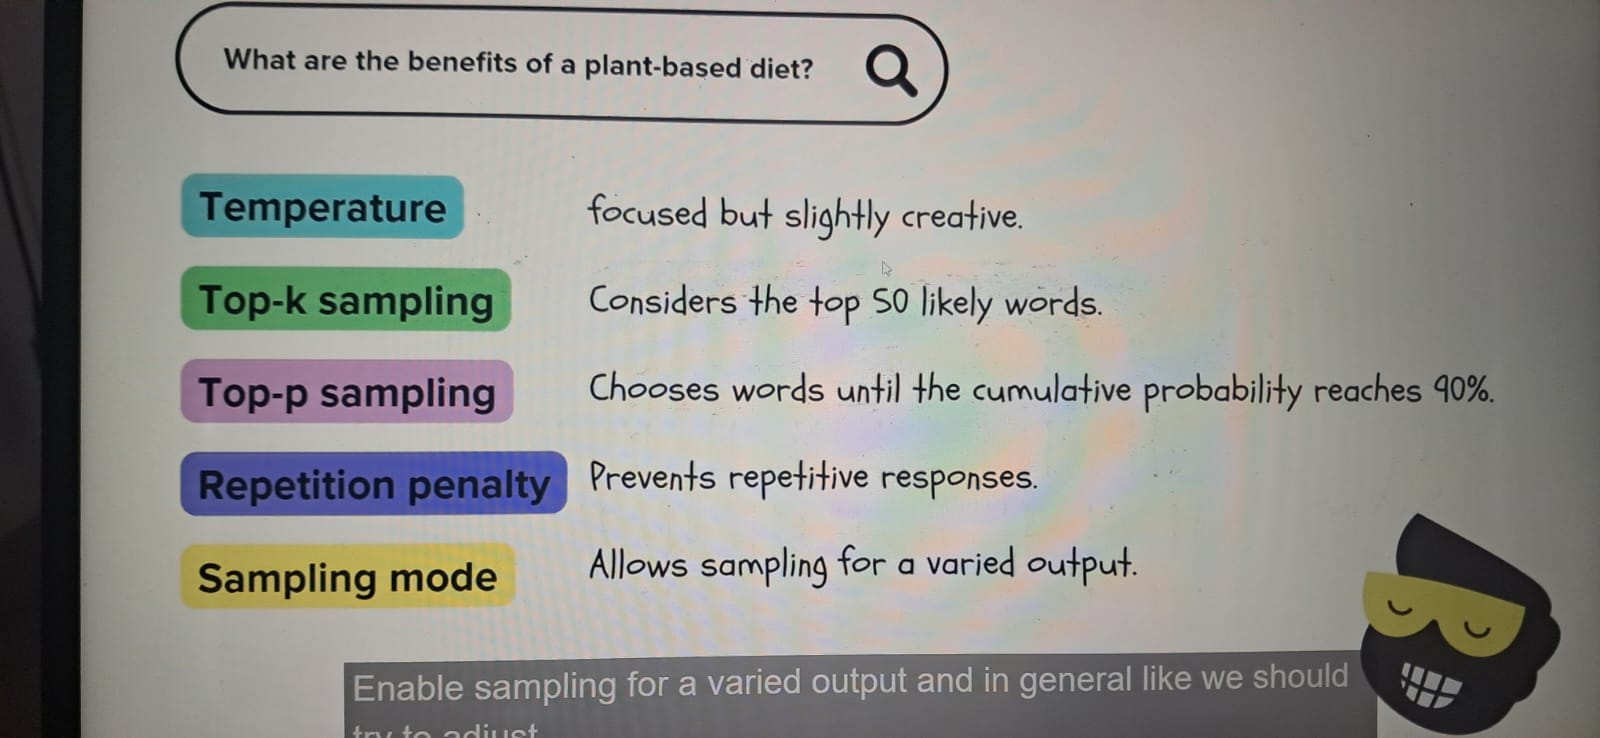


# generate need to improve

In [48]:
# Define a function to generate text based on context and query
def generate_text(context, query, model, tokenizer, max_length = 100):
    # Format the input text with context and query
    input_text = f"Context {context}\nQuestion: {query}\nAnswer:"

    # Tokenize the input text and prepare tensors for the model
    inputs = tokenizer(input_text,
                       return_tensors="pt",
                       padding=True,
                       truncation=True)

    input_ids = inputs['input_ids']
    attention_masks = (input_ids != tokenizer.pad_token_id).long()

    # Generate text using the model
    outputs = model.generate(
        input_ids,
        attention_mask=attention_masks,
        max_length=max_length,
        pad_token_id=tokenizer.eos_token_id,
        temperature=0.5, #<------------------- these are added
        top_k=20,  #<------------------- these are added
        top_p=0.8, #<------------------- these are added
        repetition_penalty=1.2, #<------------------- these are added
        do_sample=True
    )

    # Decode the generated text to a readable format
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [49]:
#define the rag function than integrate retrival and generation
def rag(query,retrieval_tokenizer,retrieval_model,retrival_index,gen_model,gen_tokenizer,documents,top_k):
    retrieved_docs,distances=retrieve(query,retrieval_tokenizer,
                                      retrieval_model,
                                      retrival_index,
                                      documents,top_k)
    #discard all documents that do not meet the relevance criteria
    relevant_docs = [doc for doc, distance in zip(retrieved_docs, distances) if is_relevant(distance, 40)]

    #add a message if no retieved doc is relevant
    if not relevant_docs:
        return "There is no relevant information"
    context=" ".join(retrieved_docs)
    generated_answer = generate_text(context, query, gen_model, gen_tokenizer)
    return generated_answer

In [50]:
# Test the RAG system
for query in queries:
  # Get the generated answer for each query using the RAG function
  answer = rag(query,
               tokenizer,
               model, index,
               gen_model,
               gen_tokenizer,
               documents,
               3)

  # Print the query and the corresponding generated answer
  print(f"Query: {query}\nAnswer: {answer}\n")

Query: What is the capital of Germany?
Answer: Context Berlin is the capital and largest city of Germany by both area and population. Berlin is a major center for culture, politics, media, and science. Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie.
Question: What is the capital of Germany?
Answer: The German Capital (GDR) has been established in 1871 as part to protect citizens from foreign invasion or attack on their property through legislation enacted during World War I which was implemented after

Query: What is Berlin famous for?
Answer: Context Berlin is known for its art scene and modern landmarks like the Berliner Philharmonie. Berlin is a major center for culture, politics, media, and science. Berlin is famous for its diverse architecture, ranging from historic buildings to modern structures.
Question: What is Berlin famous for?
Answer: The city has many interesting attractions that are unique in their own right but also have some of the